In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv(
    r"C:\Users\hp r5\OneDrive\Desktop\Fintect System\Advance-Fintech-System\data\nse_data\Quote-Equity-RELIANCE-EQ-17-01-2025-17-01-2026.csv",
    encoding="utf-8"
)

In [3]:
df.head(5)

,DATE,SERIES,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO. OF TRADES
0,16-Jan-2026,EQ,"1,458.80","1,480.00","1,455.10","1,458.80","1,461.00","1,457.90","1,464.15","1,611.80","1,114.85",17167161,"25,13,52,47,618.00",289037
1,14-Jan-2026,EQ,"1,444.00","1,467.00","1,440.20","1,452.80","1,458.80","1,458.80","1,458.22","1,611.80","1,114.85",8321764,"12,13,49,50,551.20",167816
2,13-Jan-2026,EQ,"1,485.00","1,485.80","1,444.70","1,483.20","1,456.90","1,452.80","1,457.67","1,611.80","1,114.85",13499760,"19,67,81,31,155.40",289198
3,12-Jan-2026,EQ,"1,475.30","1,485.30","1,451.00","1,475.30","1,484.00","1,483.20","1,469.79","1,611.80","1,114.85",8883745,"13,05,72,59,395.40",236827
4,09-Jan-2026,EQ,"1,465.00","1,479.90","1,465.00","1,470.60","1,476.00","1,475.30","1,472.13","1,611.80","1,114.85",8335311,"12,27,06,72,520.90",237412


In [4]:
df.shape

(248, 14)

In [5]:
df.describe()

,VOLUME,NO. OF TRADES
count,2.480000e+02,248.000000
mean,1.124192e+07,240014.342742
std,4.917789e+06,105941.376649
min,2.066169e+06,81976.000000
25%,7.841114e+06,179463.000000
50%,1.018406e+07,215203.000000
75%,1.347097e+07,269837.250000
max,3.253897e+07,893347.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DATE            248 non-null    object
 1   SERIES          248 non-null    object
 2   OPEN            248 non-null    object
 3   HIGH            248 non-null    object
 4   LOW             248 non-null    object
 5   PREV. CLOSE     248 non-null    object
 6   LTP             248 non-null    object
 7   CLOSE           248 non-null    object
 8   VWAP            248 non-null    object
 9   52W H           248 non-null    object
 10  52W L           248 non-null    object
 11  VOLUME          248 non-null    int64 
 12  VALUE           248 non-null    object
 13  NO. OF  TRADES  248 non-null    int64 
dtypes: int64(2), object(12)
memory usage: 27.2+ KB


In [7]:
df.isnull().sum()

DATE              0
SERIES            0
OPEN              0
HIGH              0
LOW               0
PREV. CLOSE       0
LTP               0
CLOSE             0
VWAP              0
52W H             0
52W L             0
VOLUME            0
VALUE             0
NO. OF  TRADES    0
dtype: int64

In [8]:
df['DATE']=pd.to_datetime(df['DATE'])

In [9]:
df['SERIES'] = df['SERIES'].astype(str).str.strip()

In [12]:
date_cols = ['DATE']
cat_cols = ['SERIES']
num_cols = [
    'OPEN', 'HIGH', 'LOW', 'PREV. CLOSE', 'LTP',
    'CLOSE', 'VWAP', '52W H', '52W L',
    'VOLUME', 'VALUE'
]

In [13]:
# cleaning data or replacing the ,
df['SERIES'] = df['SERIES'].astype(str).str.strip()
for col in num_cols:
    df[col]=(
        df[col].astype(str).str.replace(',','',regex=False)
    )

df[num_cols]=df[num_cols].apply(pd.to_numeric,errors='coerce')

In [14]:
df.head(4)

,DATE,SERIES,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO. OF TRADES
0,2026-01-16,EQ,1458.8,1480.0,1455.1,1458.8,1461.0,1457.9,1464.15,1611.8,1114.85,17167161,2.513525e+10,289037
1,2026-01-14,EQ,1444.0,1467.0,1440.2,1452.8,1458.8,1458.8,1458.22,1611.8,1114.85,8321764,1.213495e+10,167816
2,2026-01-13,EQ,1485.0,1485.8,1444.7,1483.2,1456.9,1452.8,1457.67,1611.8,1114.85,13499760,1.967813e+10,289198
3,2026-01-12,EQ,1475.3,1485.3,1451.0,1475.3,1484.0,1483.2,1469.79,1611.8,1114.85,8883745,1.305726e+10,236827


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            248 non-null    datetime64[ns]
 1   SERIES          248 non-null    object        
 2   OPEN            248 non-null    float64       
 3   HIGH            248 non-null    float64       
 4   LOW             248 non-null    float64       
 5   PREV. CLOSE     248 non-null    float64       
 6   LTP             248 non-null    float64       
 7   CLOSE           248 non-null    float64       
 8   VWAP            248 non-null    float64       
 9   52W H           248 non-null    float64       
 10  52W L           248 non-null    float64       
 11  VOLUME          248 non-null    int64         
 12  VALUE           248 non-null    float64       
 13  NO. OF  TRADES  248 non-null    int64         
dtypes: datetime64[ns](1), float64(10), int64(2), object(1)
mem

In [ ]:
#univeriant analysis
df.nunique()

DATE              248
SERIES              1
OPEN              227
HIGH              232
LOW               239
PREV. CLOSE       238
LTP               232
CLOSE             238
VWAP              247
52W H              17
52W L               5
VOLUME            248
VALUE             248
NO. OF  TRADES    248
dtype: int64

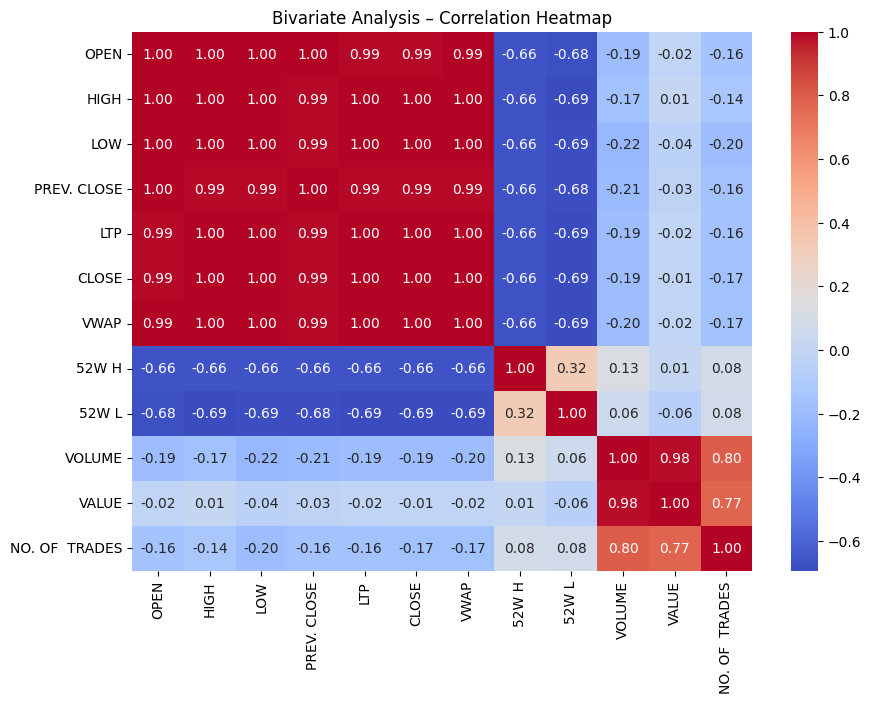

In [21]:
# Correlation matrix (numeric columns only)
z = df.corr(numeric_only=True)

plt.figure(figsize=(10, 7))
sns.heatmap(z, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Bivariate Analysis – Correlation Heatmap")
plt.show()